In [1]:
import imp
import rdkit, h5py
from rdkit import Chem
from rdkit.Chem import rdFMCS,AllChem,Draw
from rdkit import DataStructs

import numpy as np
import pandas as pd


In [2]:
def get_sim(mol, sub_mol) -> float: 
    try:
        res = rdFMCS.FindMCS([mol, sub_mol], timeout=1, bondCompare=rdFMCS.BondCompare.CompareAny, ringMatchesRingOnly=True, atomCompare=rdFMCS.AtomCompare.CompareAny)
        if res.smartsString == "" or res.canceled:
            return 0
        mcs_mol = Chem.MolFromSmarts(res.smartsString)
        Chem.SanitizeMol(mcs_mol)

        mcs_mol_fp = AllChem.GetMorganFingerprintAsBitVect(mcs_mol, 2, nBits=2048)
        sub_mol_fp = AllChem.GetMorganFingerprintAsBitVect(sub_mol, 2, nBits=2048)
        sim = DataStructs.FingerprintSimilarity(sub_mol_fp, mcs_mol_fp)

        
    except Exception as e:
        print("...Exception Occurred at {:1}:".format(Chem.MolToSmiles(mol)))
        print(e)
        return 0
    
    print("original_mol:")
    display(Draw.MolToImage(mol))
    print("sub_mol:")
    display(Draw.MolToImage(sub_mol))
    print("mcs_mol:")
    display(Draw.MolToImage(mcs_mol))

    return sim

In [3]:
sub_mol = Chem.MolFromSmiles("C1C(C2(=O))C(=O)C=CC2CC1")
mol = Chem.Mol(binmols[92435])
print(get_sim(mol, sub_mol))
Draw.MolToImage(sub_mol)

NameError: name 'binmols' is not defined

In [4]:
sub_mol = Chem.MolFromSmiles("O=C(OC)C1=CC(C2=O)CCCC2C1=O")
#sub_mol = Chem.MolFromSmiles("C1C(C2(=O))C(=O)C=CC2CC1")
Draw.MolToImage(sub_mol)
#mol = Chem.MolFromSmiles("CC1(C)C(CCC2(C)C1CCC(C34C)(C)C2CC(C)(C4=O)C(C)=C(C(OC)=O)C3=O)=O")
mol = Chem.Mol(binmols[92435])
print(get_sim(mol, sub_mol))


NameError: name 'binmols' is not defined

In [4]:
#Load HDF5 file
#dataset_filename = r"C:\Users\Leave\OneDrive - hust.edu.cn\大创\pcko1-Deep-Drug-Coder-d6e7ef3\datasets\CHEMBL25_TRAIN_MOLS.h5"
dataset_filename = r"../datasets/CHEMBL25_FILTERED_2.h5"
with h5py.File(dataset_filename, "r") as f:
    binmols = np.asarray(f["mols"])
    idxs = np.asarray(f["idxs"])
    sims = np.asarray(f["sims"])


In [5]:
smiles_data = []
for idx, binmol in enumerate(binmols):
    mol = Chem.Mol(binmol)
    smiles = Chem.MolToSmiles(mol)
    smiles_data.append(smiles)
smiles_data = np.asarray(smiles_data)

#sims = [eval(sim) for idx, sim in enumerate(sims)]

data = np.asarray([idxs, smiles_data, sims]).T


In [6]:
pd_data = pd.DataFrame(data, columns=["index", "smiles", "sub_similarity"], copy=True)
#pd_data.sort_values("sub_similarity").tail(20)
#len(pd_data.loc[[eval(i)<0.3 for i in pd_data["sub_similarity"]]])


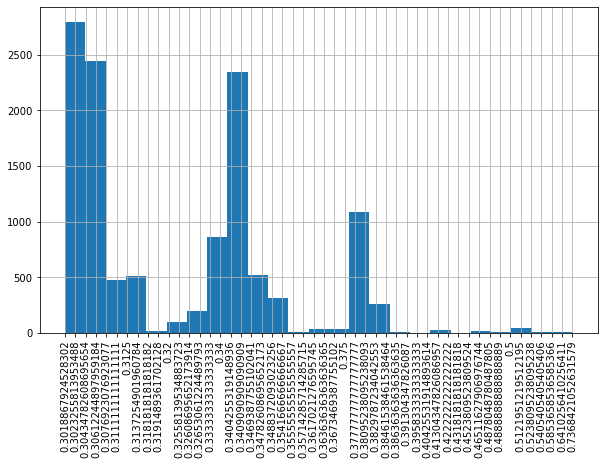

In [11]:
# 绘制样品分布
pd_data["sub_similarity"].sort_values().hist(bins=25, figsize=(10, 6), xrot=90)


In [12]:
pd_data.sort_values("sub_similarity").tail(20)

,index,smiles,sub_similarity
5583,618848,O=C(COC(=O)C1CC2CCCC(C1)C2=O)NNC(=O)c1ccc([N+]...,0.5238095238095238
4791,523199,CC(=O)Nc1ccc(C(=O)COC(=O)C2CC3CCCC(C2)C3=O)cc1,0.5238095238095238
6658,736684,Cc1[nH]c(=NC(=O)COC(=O)C2CC3CCCC(C2)C3=O)c(Cl)...,0.5238095238095238
11045,1229345,N#CCN(C(=O)COC(=O)C1CC2CCCC(C1)C2=O)c1ccccc1,0.5238095238095238
3935,427969,CNS(=O)(=O)NC(=O)c1cc(Cl)c(OC2C3CC4CC2CC(C(=O)...,0.5238095238095238
5786,637990,COC(=O)c1ccc(C)c(NC(=O)COC(=O)C2CC3CCCC(C2)C3=...,0.5238095238095238
654,71471,CN(CC(=O)Nc1ccc(Cl)c(C(F)(F)F)c1)C(=O)COC(=O)C...,0.5238095238095238
6043,668666,COc1ccc(OC)c(C(=O)COC(=O)C2CC3CCCC(C2)C3=O)c1,0.5238095238095238
3009,323487,COc1cccc(NC(=O)COC(=O)C2CC3CCCC(C2)C3=O)c1,0.5238095238095238
6045,669347,Cc1cc(C)c(C(=O)COC(=O)C2CC3CCCC(C2)C3=O)c(C)c1,0.5238095238095238


In [13]:
len(pd_data)

12113